# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [28]:
df_filt = df.drop(columns=['Unnamed: 0','data_ref','index','sexo','posse_de_veiculo','posse_de_imovel',
                           'tipo_renda','educacao','estado_civil','tipo_residencia','mau'])

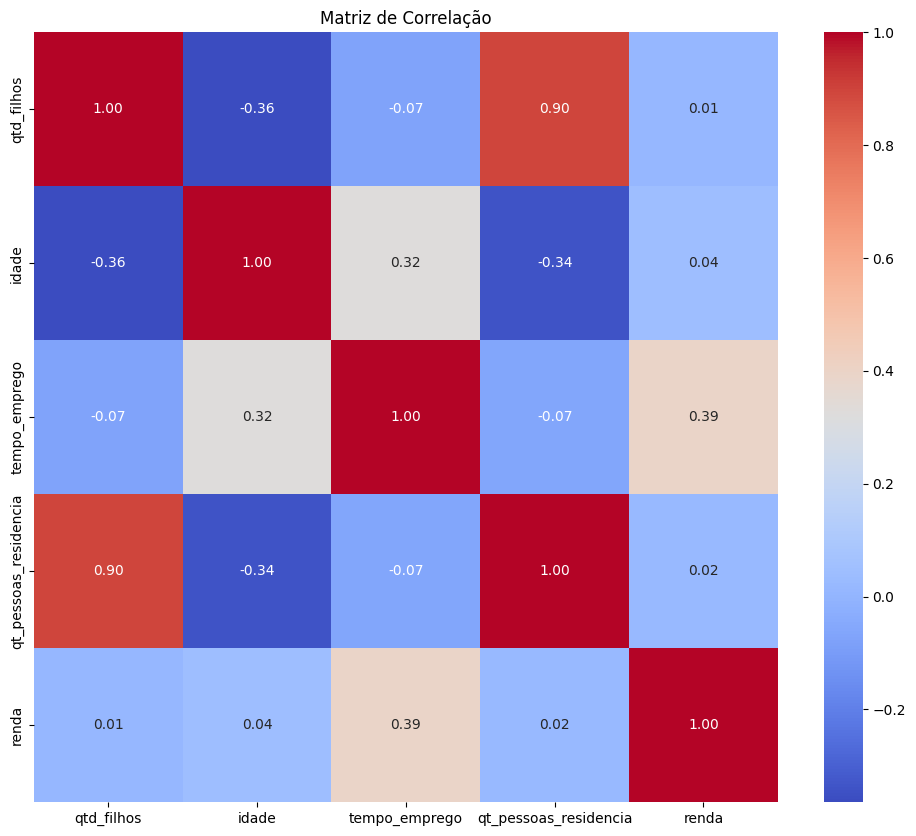

In [29]:
correlation_matrix = df_filt.corr()

# Plotando a matriz de correlação usando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [30]:
df_filt2 =df.drop(columns=['Unnamed: 0','data_ref','index'])

In [31]:
# Lista das colunas que precisam de dummy
columns_to_dummy = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Aplicando dummy
df_filt2 = pd.get_dummies(df_filt2, columns=columns_to_dummy, drop_first=True)

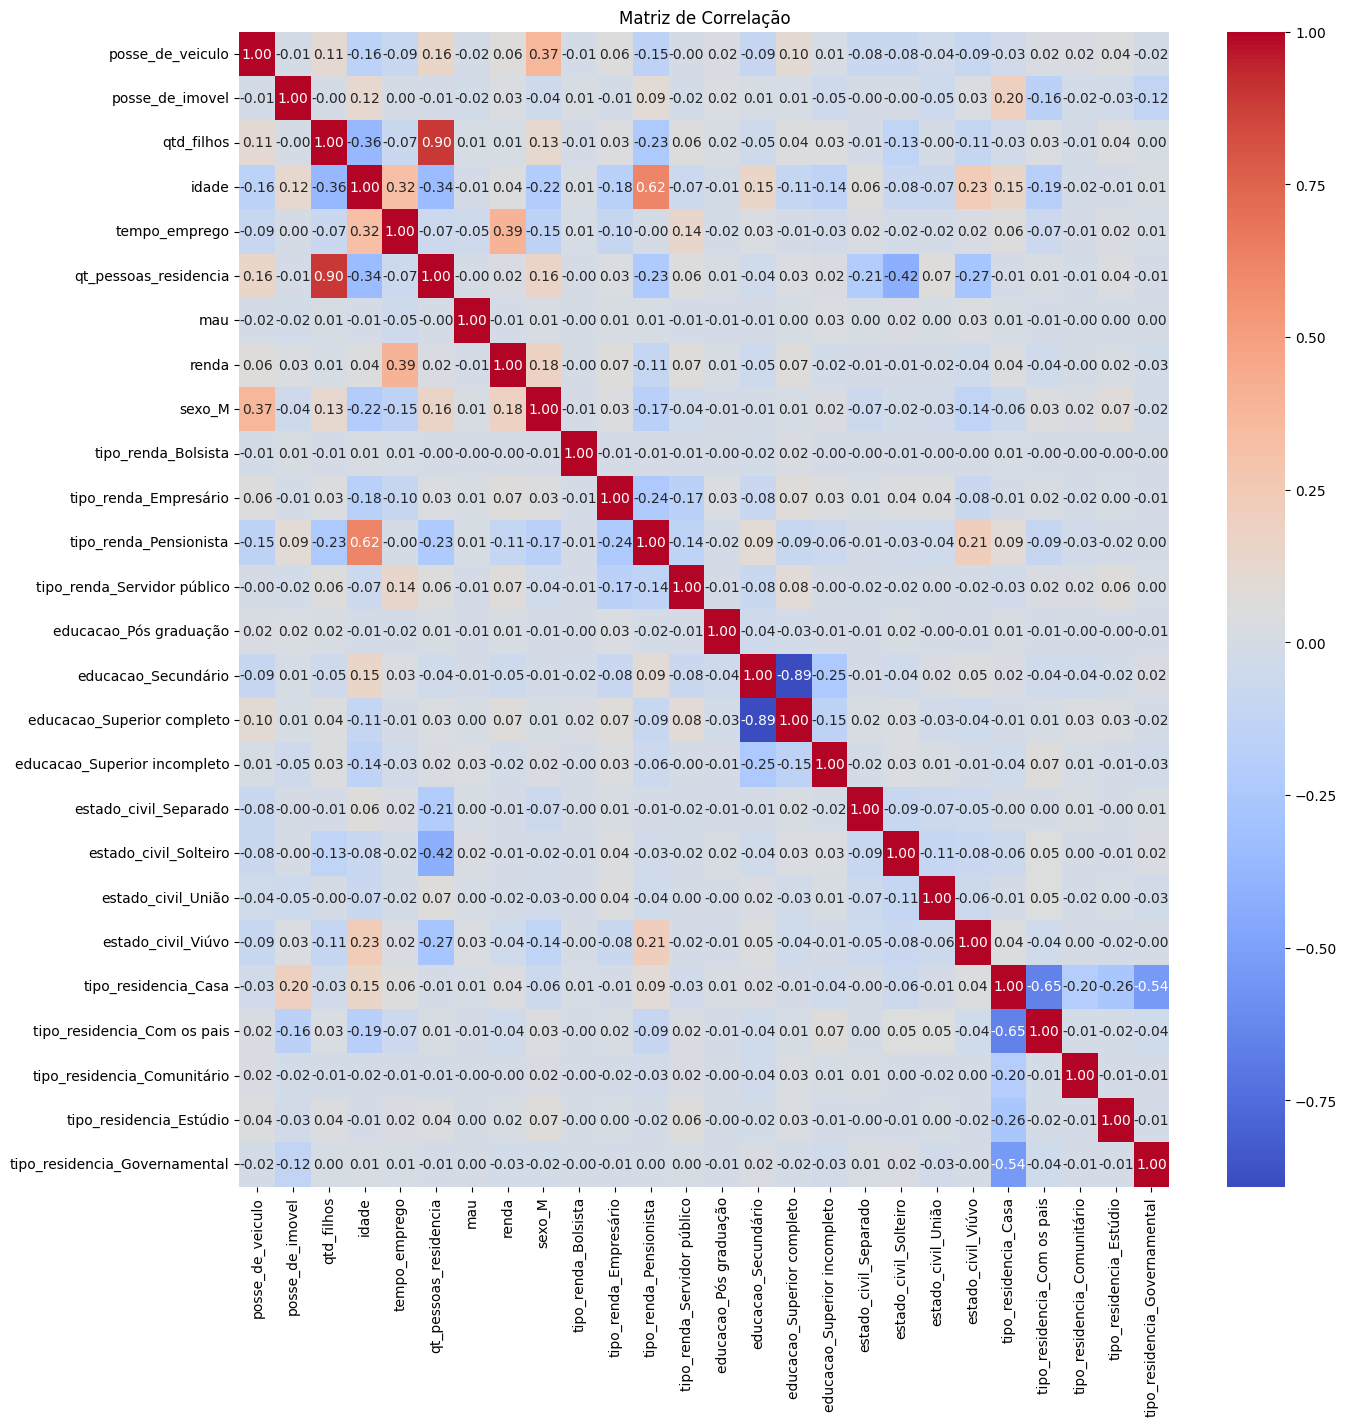

In [36]:
correlation_matrix2 = df_filt2.corr()

# Plotando a matriz de correlação usando seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

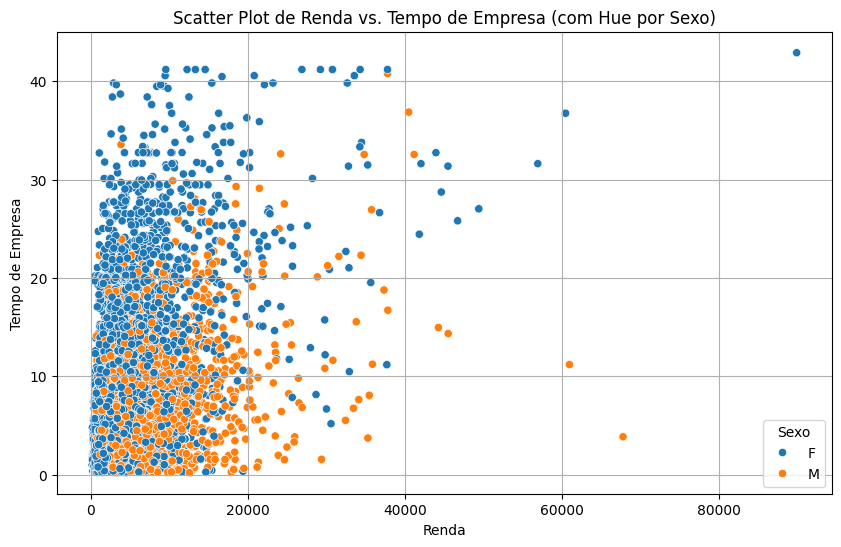

In [37]:
# Scatter plot usando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='renda', y='tempo_emprego', hue='sexo')
plt.title('Scatter Plot de Renda vs. Tempo de Empresa (com Hue por Sexo)')
plt.xlabel('Renda')
plt.ylabel('Tempo de Empresa')
plt.grid(True)
plt.legend(title='Sexo')
plt.show()

3) Na su aopinião, há outliers na variável renda?

Sim, existem outliers o que é perfeitamente normal, pois podems er algum tipo de diretor

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [38]:
import numpy as np

df['renda_log'] = np.log(df['renda'])

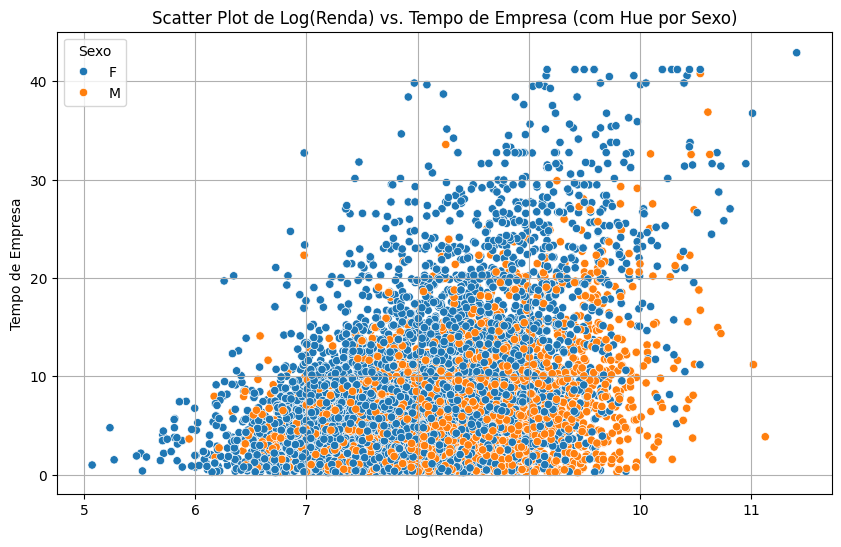

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='renda_log', y='tempo_emprego', hue='sexo')
plt.title('Scatter Plot de Log(Renda) vs. Tempo de Empresa (com Hue por Sexo)')
plt.xlabel('Log(Renda)')
plt.ylabel('Tempo de Empresa')
plt.grid(True)
plt.legend(title='Sexo')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Na minha visão melhorou mas não trouxe ainda muitos insights relevantes